In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
content_data = pd.read_csv("all_content_tf-idf.csv")
topic_data = pd.read_csv("all_topics_tf-idf.csv")

In [15]:
topic_data

,id,title,description,channel,category,level,language,parent,has_content,combined_text
0,t_00004da3a1b2,detect resistor,investig materi caus reduct deflect connect se...,000cf7,source,4,bg,t_16e29365b50d,True,detect resistor investig materi caus reduct de...
1,t_00068291e9a4,input output function,understand littl function,8e286a,source,4,pt,t_d14b6c2a2b70,True,input output function understand littl functio...
2,t_00069b63a70a,transcript,NaN,6e3ba4,source,3,en,t_4054df11a74e,True,transcript flow chart logic think engin blossom
3,t_0006d41a73a8,graph exponenti function algebra 2 level,learn graph complex exponenti function form,000cf7,source,4,bg,t_e2452e21d252,True,graph exponenti function algebra 2 level learn...
4,t_0008768bdee6,sum 100,learn add number like 37 49,5223e0,supplemental,4,gu,t_0da7a331d666,True,sum 100 learn add number like 37 49 add subtra...
...,...,...,...,...,...,...,...,...,...,...
61512,t_fff830472691,scalar project,NaN,fef095,source,4,en,t_c75d6acecf78,True,scalar project vector analysi analysi math
61513,t_fff9e5407d13,newspap,NaN,71fd51,supplemental,2,es,t_5bd8f6ae9f7d,True,newspap spanish languag faq spanish
61514,t_fffbe1d5d43c,inscrib shape problem solv,use properti inscrib angl prove properti inscr...,0c929f,source,4,sw,t_50145b9bab3f,True,inscrib shape problem solv use properti inscri...
61515,t_fffe14f1be1e,lesson 7,NaN,6e90a7,aligned,6,es,t_d448c707984d,True,lesson 7 unit 4 spanish activ 1st 01 first


In [16]:
content_data

,id,title,description,kind,text,language,copyright_holder,license,combined_text
0,c_00002381196d,add number,add use standard algorithm,video,NaN,es,NaN,NaN,add number add use standard algorithm video
1,c_000087304a9e,find factor number,sal find factor 120,video,NaN,it,NaN,NaN,find factor number sal find factor 120 video
2,c_0000ad142ddb,add demand curv,add demand curv,video,NaN,es,NaN,NaN,add demand curv add demand curv video
3,c_0000c03adc8d,approach swim,thi video learn approach swim techniqu keep ey...,document,approach swim know swim wave without board ess...,pt,Sikana Education,CC BY-NC-ND,approach swim thi video learn approach swim te...
4,c_00016694ea2a,NaN,NaN,document,new york state common core standard math sylla...,es,Engage NY,CC BY-NC-SA,new york state common core standard math syll...
...,...,...,...,...,...,...,...,...,...
154042,c_fffcbdd4de8b,2 12 diffus,NaN,html5,eventu happen dye blend togeth dye move water ...,en,CSU and Merlot,CC BY-NC-SA,2 12 diffus eventu happen dye blend togeth dye...
154043,c_fffe15a2d069,add make group 10,sal add break 5 2 3,video,NaN,it,NaN,NaN,add make group 10 sal add break 5 2 3 video
154044,c_fffed7b0d13a,introduct subtract,sal talk mean subtract exampl use,video,NaN,pt,NaN,NaN,introduct subtract sal talk mean subtract exam...
154045,c_ffff04ba7ac7,sa cone,NaN,video,NaN,en,NaN,NaN,sa cone video


In [4]:
content = content_data.head(10000)
topics = topic_data.head(10000)

In [5]:
# Concatenate the text data from both DataFrames
all_text = pd.concat([topics['combined_text'], content['combined_text']], axis=0)

In [6]:
tfidfvectoriser = TfidfVectorizer()

In [7]:
# Fit the vectorizer on the combined text data
tfidfvectoriser.fit(all_text)

TfidfVectorizer()

In [8]:
# Transform the text data from both DataFrames into TF-IDF vectors
tfidf_vectors_topics = tfidfvectoriser.transform(topics['combined_text'])
tfidf_vectors_content = tfidfvectoriser.transform(content['combined_text'])

In [9]:
tfidf_vectors_topics

<10000x16818 sparse matrix of type '<class 'numpy.float64'>'
	with 130624 stored elements in Compressed Sparse Row format>

In [10]:
tfidf_vectors_content

<10000x16818 sparse matrix of type '<class 'numpy.float64'>'
	with 175032 stored elements in Compressed Sparse Row format>

In [11]:
# Convert TF-IDF vectors to dense arrays for visualization
tfidf_topics_array = tfidf_vectors_topics.toarray()


In [12]:
tfidf_content_array = tfidf_vectors_content.toarray()

In [13]:
# Apply PCA for dimensionality reduction (you can adjust n_components)
pca = PCA(n_components=2)
tfidf_topics_pca = pca.fit_transform(tfidf_topics_array)
tfidf_content_pca = pca.fit_transform(tfidf_content_array)

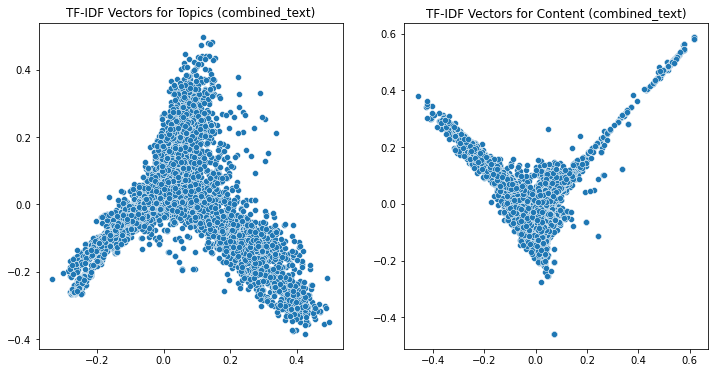

In [14]:
# Create scatter plots for TF-IDF vectors
plt.figure(figsize=(12, 6))
plt.subplot(121)

sns.scatterplot(x=tfidf_topics_pca[:, 0], y=tfidf_topics_pca[:, 1])
plt.title('TF-IDF Vectors for Topics (combined_text)')

plt.subplot(122)
sns.scatterplot(x=tfidf_content_pca[:, 0], y=tfidf_content_pca[:, 1])
plt.title('TF-IDF Vectors for Content (combined_text)')

plt.show()

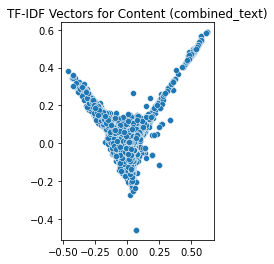

In [71]:
plt.subplot(122)
sns.scatterplot(x=tfidf_content_pca[:, 0], y=tfidf_content_pca[:, 1])
plt.title('TF-IDF Vectors for Content (combined_text)')

plt.show()